In [2]:
import pandas as pd
import numpy as np

### Zaimportuj i przejrzyj dane

In [3]:
#Zaimportuj dane
dane = pd.read_csv('../data/DataWorkshop.csv')

In [4]:
print('Rozmiar zbioru: ', dane.shape)
print('\nKolumny w zbiorze: ', dane.columns)

Rozmiar zbioru:  (229929, 30)

Kolumny w zbiorze:  Index(['Data zdarzenia', 'Godzina', 'GPS x', 'GPS y', 'Miejscowość', 'Ulica',
       'Numer domu', 'Numer drogi', 'KM HM (Pikietaż)', 'Obszar',
       'Skrzyżowanie', 'Geometria drogi', 'Charakterystyka miejsca zdarzenia',
       'Oświetlenie', 'Warunki atmosferyczne', 'Rodzaj zdarzenia', 'Wina',
       'Rodzaj drogi', 'Nawierzchnia drogi', 'Stan nawierzchni',
       'Sygnalizacja świetlna', 'Oznakowanie poziome',
       'Liczba pasów w zdarzeniu', 'Zachowanie kierującego',
       'Zachowanie pieszego', 'Inne przyczyny', 'Liczba rannych w zdarzeniu',
       'Liczba zabitych w zdarzeniu', 'Liczba kolizji', 'Liczba wypadków'],
      dtype='object')


In [5]:
print('Typy danych: ')
dane.dtypes

Typy danych: 


Data zdarzenia                        object
Godzina                               object
GPS x                                 object
GPS y                                 object
Miejscowość                           object
Ulica                                 object
Numer domu                            object
Numer drogi                           object
KM HM (Pikietaż)                      object
Obszar                                object
Skrzyżowanie                          object
Geometria drogi                       object
Charakterystyka miejsca zdarzenia     object
Oświetlenie                           object
Warunki atmosferyczne                 object
Rodzaj zdarzenia                      object
Wina                                  object
Rodzaj drogi                          object
Nawierzchnia drogi                    object
Stan nawierzchni                      object
Sygnalizacja świetlna                 object
Oznakowanie poziome                   object
Liczba pas

In [6]:
print('próbka danych')
dane.sample(3)

próbka danych


,Data zdarzenia,Godzina,GPS x,GPS y,Miejscowość,Ulica,Numer domu,Numer drogi,KM HM (Pikietaż),Obszar,...,Sygnalizacja świetlna,Oznakowanie poziome,Liczba pasów w zdarzeniu,Zachowanie kierującego,Zachowanie pieszego,Inne przyczyny,Liczba rannych w zdarzeniu,Liczba zabitych w zdarzeniu,Liczba kolizji,Liczba wypadków
30203,2016-08-10,13:10:00,18*38'338,50*19'495,GLIWICE,ZYGMUNTOWSKA,90,G130039S,NaN,Obszar zabudowany,...,Brak,Jest,2.0,Niedostosowanie prędkości do warunków ruchu,NaN,NaN,0,0,1,0
144380,2018-08-09,16:40:00,18*55'334,50*16'218,ŚWIĘTOCHŁOWICE,BUKOWA,158,I2,NaN,Obszar zabudowany,...,Brak,Nie ma,2.0,Nieprawidłowe skręcanie,NaN,NaN,0,0,1,0
130374,2018-05-11,20:07:00,18*49'225,50*19'406,ZABRZE,WOJCIECHA DRZYMAŁY,20,G143602S,NaN,Obszar zabudowany,...,Brak,Nie ma,2.0,Niedostosowanie prędkości do warunków ruchu,NaN,NaN,0,0,1,0


### Wyczyść dane

#### Konwersja typu danych.

In [7]:
#Skopiuj dane, aby uniknąć nadpisania
df = dane.copy()

#### Kolumny zawierające datę i czas

In [8]:
print('kolumna DATA ZDARZENIA: ', df['Data zdarzenia'].dtypes)
print('kolumna GODZINA: ', df['Data zdarzenia'].dtypes)
print('Potrzebna konwersja do typu DATETIME')

kolumna DATA ZDARZENIA:  object
kolumna GODZINA:  object
Potrzebna konwersja do typu DATETIME


In [9]:
# Sklejmy kolumny DATA ZDARZENIA i GODZINA, by uzyskać pełną datę zdarzenia
df['data_full'] = df['Data zdarzenia'] + ' ' + df['Godzina']
df['data_full'].sample(1)

11674    2016-03-31 09:25:00
Name: data_full, dtype: object

In [10]:
# Przekonwertujmy do formatu datetime
df['data_full'] =  pd.to_datetime( df['data_full'], format='%Y-%m-%d %H:%M:%S.%f')
print('Przykładowa komórka: ', df['data_full'].sample(1))

Przykładowa komórka:  174441   2019-02-04 09:32:00
Name: data_full, dtype: datetime64[ns]


In [11]:
# Stwórzmy dodatkowe kolumny zawierające małe porcje danych takich jak informacja o miesiącu, dniu tygodnia, godzinie etc
# by przeszukiwanie danych było prostsze
df['rok'] = pd.DatetimeIndex(df['data_full']).year
df['miesiac'] = pd.DatetimeIndex(df['data_full']).month
df['godzina'] = pd.DatetimeIndex(df['data_full']).hour
df['minuta'] = pd.DatetimeIndex(df['data_full']).minute
df['pelna_data'] = pd.DatetimeIndex(df['data_full']).date # żeby rozróżnić dzień miesiąca, ex. 2019-05-18

#Który to był dzień tygodnia? poniedziałek = 0, niedziela = 6
df['dzien_tygodnia'] = pd.DatetimeIndex(df['data_full']).dayofweek

#Czy to był weekend?
df['czy_weekend'] = df['dzien_tygodnia'].apply(lambda x: 1 if (x == 6 or x == 5 ) else 0 )

#czy to była niedziela handlowa?

In [12]:
df.sample(3)

,Data zdarzenia,Godzina,GPS x,GPS y,Miejscowość,Ulica,Numer domu,Numer drogi,KM HM (Pikietaż),Obszar,...,Liczba kolizji,Liczba wypadków,data_full,rok,miesiac,godzina,minuta,pelna_data,dzien_tygodnia,czy_weekend
102641,2017-11-15,17:10:00,19*04'520,49*42'452,GODZISZKA,BESKIDZKA,101,P1405S,NaN,Obszar zabudowany,...,1,0,2017-11-15 17:10:00,2017,11,17,10,2017-11-15,2,0
144855,2018-08-13,18:40:00,19*09'176,50*46'471,CZĘSTOCHOWA,ŁUKASIŃSKIEGO,83,G110487S,NaN,Obszar zabudowany,...,1,0,2018-08-13 18:40:00,2018,8,18,40,2018-08-13,0,0
177556,2019-02-25,06:20:00,19*13'053,50*17'125,SOSNOWIEC,NaN,NaN,S1,NaN,Obszar niezabudowany,...,1,0,2019-02-25 06:20:00,2019,2,6,20,2019-02-25,0,0


#### Współrzęne geograficzne

In [13]:
print('kolumna GPS X: ', df['GPS x'].dtypes)
print('kolumna GPS Y: ', df['GPS y'].dtypes)
print('1. To powinien być format FLOAT')
print('2. Współrzędne nie są poprawne, trzeba ściągnąć nowe i porównać.')

kolumna GPS X:  object
kolumna GPS Y:  object
1. To powinien być format FLOAT
2. Współrzędne nie są poprawne, trzeba ściągnąć nowe i porównać.


In [14]:
# kod Krzysztofa
import re
# https://stackoverflow.com/questions/33997361
def dms2dd(coord):
    """ GPS HH.MM.SS.S to DD (Decimal Degrees) conversion """
    c = re.findall(r"\w+", coord)
    degrees = float(c[0])
    minutes = float(c[1])
    if len(c) > 2:
        seconds = float(c[2])/10   
    else:
        seconds = 0
    dd = (float(degrees) + (minutes)/60 + float(seconds)/(60*60))
    return dd


In [15]:
df['GPS_x'] = df['GPS x'].apply(lambda x : dms2dd(x))
df['GPS_y'] = df['GPS y'].apply(lambda x : dms2dd(x)) 

In [16]:
df.sample(3)

,Data zdarzenia,Godzina,GPS x,GPS y,Miejscowość,Ulica,Numer domu,Numer drogi,KM HM (Pikietaż),Obszar,...,data_full,rok,miesiac,godzina,minuta,pelna_data,dzien_tygodnia,czy_weekend,GPS_x,GPS_y
67800,2017-04-12,20:25:00,18*45'399,50*17'373,ZABRZE,FRANKLINA ROOSEVELTA,120,P8202S,NaN,Obszar zabudowany,...,2017-04-12 20:25:00,2017,4,20,25,2017-04-12,2,0,18.761083,50.293694
189543,2019-05-09,16:04:00,18*53'593,50*49'463,WRĘCZYCA WIELKA,SIENKIEWICZA,NaN,P2065S,NaN,Obszar zabudowany,...,2019-05-09 16:04:00,2019,5,16,4,2019-05-09,3,0,18.899806,50.829528
150119,2018-09-16,18:05:00,18*54'531,50*57'398,MOKRA,NaN,196,P2023S,NaN,Obszar zabudowany,...,2018-09-16 18:05:00,2018,9,18,5,2018-09-16,6,1,18.914750,50.961056


#### Kolumny zawierające informacje o miejscu zdarzenia

In [17]:
# zbudujmy funkcje, które pozwolą nam modyfikować stringi w kolumnach i komórkach
# niektóre stringi i znaki interpunkcyjne będą przeszkadzać w analizie i edycji, dlatego pozbądźmy się ich

def simplify(a):        
    a = a.replace('\'','')                   # usuń znaki '
    a = a.replace('\n','')                   # usuń znaki nowej linii
    a = a.replace(';','')                    # usuń średniki
    a = a.replace(',','')                    # usuń przecinki
    a = a.replace('.',' ')                   # zamień kropki na spacje (ze względu na dziwny zapis w adresach)
    a = a.replace('  ',' ')                  # usuń podwójne spacje
    a = a.replace('(od 11 2015)','')         # usuń ciąg "(od 11.2015)"
    a = a.lower()                            # zamień wielkie litery na małe
    a=' '.join(unique_list(a.split()))       # usuń zduplikowane słowa
    return(a)

def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist    
    
def simplify_column(serie):
    a = serie.unique()                       # wrzuć wartości do tablicy numpy
    a = np.array2string(a)                   # przekształć tablicę na string
    return(simplify(a))

def simplify_cell(string):
    return(simplify(str(string)))


In [18]:
print('kolumna Miejscowość : ', df['Miejscowość'].dtypes)
print('kolumna Ulica : ', df['Ulica'].dtypes)
print('kolumna Numer domu : ', df['Numer domu'].dtypes)
print('kolumna Numer drogi: ', df['Numer drogi'].dtypes)
print('Wszystko jest poprawnie.')

kolumna Miejscowość :  object
kolumna Ulica :  object
kolumna Numer domu :  object
kolumna Numer drogi:  object
Wszystko jest poprawnie.


In [19]:
#zmieńmy nazwę kolumny na lepszą do edycji (bez spacji i wielkich liter)
df.rename(columns={'Miejscowość' : 'miasto'}, inplace=True)
df.rename(columns={'Numer domu' : 'numer_domu'}, inplace=True)
df.rename(columns={'Numer drogi' : 'numer_drogi'}, inplace=True)

In [20]:
#usuńmy z nazw ulic znaki interpunkcyjne
df['ulica'] = df['Ulica'].apply(lambda x: simplify_cell(x))
df['ulica'].head(5)

0               toszecka
1           sienkiewicza
2      ks ignacego siwca
3    józefa piłsudskiego
4               dworcowa
Name: ulica, dtype: object

In [21]:
print('kolumna KM HM (Pikietaż): ', df['KM HM (Pikietaż)'].dtypes)
#Pikietaż (kilometraż, kilometracja) – określenie miejsca na drodze lub linii kolejowej poprzez
#podanie odległości od jej początku. Odległość tę na ogół podaje się z dokładnością do 1 metra w formacie
#xx+yyy lub xx,yyy (km), gdzie:
#xx – całkowita liczba kilometrów od początku drogi lub linii kolejowej;
#yyy – całkowita liczba metrów liczona od ostatniego pełnego kilometra.
print('Przykładowe wartości z tej kolumny: ', df['KM HM (Pikietaż)'][df['KM HM (Pikietaż)'].notnull()].sample(3))
print('To powinien być format FLOAT.')

kolumna KM HM (Pikietaż):  object
Przykładowe wartości z tej kolumny:  150941      297
225744    351,7
22248        28
Name: KM HM (Pikietaż), dtype: object
To powinien być format FLOAT.


In [22]:
# 1. przekształćmy ',' na '.'
df['pikietaz'] = df['KM HM (Pikietaż)'].str.replace(',','.', regex=True)

# 2. przekształćmy string na float
df['pikietaz'] =  df['pikietaz'].astype(float)

print( 'Nowe wartości: ', df['pikietaz'][df['pikietaz'].notnull()].sample(3) )

Nowe wartości:  88572       8.5
196072    517.0
9273      591.1
Name: pikietaz, dtype: float64


In [23]:
print('kolumna OBSZAR: ', df['Obszar'].dtypes)
print('\nPrzykładowe wartości: ', df['Obszar'].unique())
print('\nZamieńmy wartości na 1 oznaczające obszar zabudowany, 0 obszar niezabudowany')

df['obszar_zabudowany'] = df['Obszar'].apply(lambda x: 1 if x == 'Obszar zabudowany' else (0 if x == 'Obszar niezabudowany' else None) )

print('\nNowe wartości w kolumnie: ', df['obszar_zabudowany'].unique())

kolumna OBSZAR:  object

Przykładowe wartości:  ['Obszar niezabudowany' 'Obszar zabudowany' nan]

Zamieńmy wartości na 1 oznaczające obszar zabudowany, 0 obszar niezabudowany

Nowe wartości w kolumnie:  [ 0.  1. nan]


In [24]:
print('kolumna SKRZYŻOWANIE: ', df['Skrzyżowanie'].dtypes)
print('\nPrzykładowe wartości: ', df['Skrzyżowanie'].unique())

#wyczyśćmy tekst
df['skrzyzowanie'] = df['Skrzyżowanie'].apply(lambda x: simplify_cell(x))

print('\nNowe wartości w kolumnie: ', df['skrzyzowanie'].unique())

kolumna SKRZYŻOWANIE:  object

Przykładowe wartości:  [nan 'Z drogą z pierwsz.' 'O ruchu okrężnym' 'Równorzędne']

Nowe wartości w kolumnie:  ['nan' 'z drogą pierwsz' 'o ruchu okrężnym' 'równorzędne']


In [25]:
print('kolumna Geometria drogi: ', df['Geometria drogi'].dtypes)
print('\nPrzykładowe wartości: ', df['Geometria drogi'].unique())

df['geometria_drogi'] = df['Geometria drogi'].apply(lambda x: simplify_cell(x))

print('\n Nowe wartości w kolumnie: ', df['geometria_drogi'].unique())

kolumna Geometria drogi:  object

Przykładowe wartości:  ['Odcinek prosty' nan 'Zakręt, łuk' 'Spadek' 'Wzniesienie'
 'Wierzchołek wzn.' 'Zakręt, łuk; Spadek' 'Odcinek prosty; Spadek'
 'Zakręt, łuk; Wzniesienie' 'Odcinek prosty; Wzniesienie'
 'Zakręt, łuk; Wierzchołek wzn.' 'Odcinek prosty; Wierzchołek wzn.'
 'Odcinek prosty; Zakręt, łuk']

 Nowe wartości w kolumnie:  ['odcinek prosty' 'nan' 'zakręt łuk' 'spadek' 'wzniesienie'
 'wierzchołek wzn' 'zakręt łuk spadek' 'odcinek prosty spadek'
 'zakręt łuk wzniesienie' 'odcinek prosty wzniesienie'
 'zakręt łuk wierzchołek wzn' 'odcinek prosty wierzchołek wzn'
 'odcinek prosty zakręt łuk']


In [26]:
print('kolumna Charakterystyka miejsca zdarzenia: ', df['Charakterystyka miejsca zdarzenia'].dtypes)
print('\n wartości: ', df['Charakterystyka miejsca zdarzenia'].unique())
print('\n Liczba wartości w kolumnie: ', df['Charakterystyka miejsca zdarzenia'].nunique())

#Wyczyścmy wpisy w kolumnie

df['charakterystyka_miejsca_zdarzenia'] = df['Charakterystyka miejsca zdarzenia'].apply(lambda x: simplify_cell(x))
print('\n Nowe wartości w kolumnie: ', df['charakterystyka_miejsca_zdarzenia'].unique())
print('\n Liczba wartości w kolumnie: ', df['charakterystyka_miejsca_zdarzenia'].nunique())

kolumna Charakterystyka miejsca zdarzenia:  object

 wartości:  ['Jezdnia' 'Chodnik, droga dla pieszych' 'Parking, plac'
 'Wjazd, wyjazd z posesji, pola' 'Parking, plac, MOP (od 11.2015)'
 'Skarpa, rów' 'Pobocze' 'Przejście dla pieszych'
 'Most, wiadukt, łącznica, tunel' 'Pas dzielący jezdnie'
 'Przejazd kolejowy strzeżony' 'Przejazd tramwajowy, torowisko'
 'Przystanek komunikacji publicznej' 'Droga dla rowerzystów'
 'Przejazd kolejowy niestrzeżony' 'Roboty drogowe, oznakowanie tymczasowe'
 'Droga, pas ruchu, śluza dla rowerów (od 11.2015)'
 'Przejazd dla rowerzystów (od 11.2015)'
 'Przewiązka na drodze dwujezdniowej' 'Parking, plac, MOP'
 'Przejazd tramwajowy, torowisko tramwajowe'
 'Droga, pas ruchu, śluza dla rowerów' 'Przejazd dla rowerzystów' nan]

 Liczba wartości w kolumnie:  23

 Nowe wartości w kolumnie:  ['jezdnia' 'chodnik droga dla pieszych' 'parking plac'
 'wjazd wyjazd z posesji pola' 'parking plac mop' 'skarpa rów' 'pobocze'
 'przejście dla pieszych' 'most wiadukt łączni

In [27]:
# w powyższych powtarzają się 'parking plac mop' i 'parking plac'
# oraz 'przejazd tramwajowy torowisko tramwajowe'  i 'przejazd tramwajowy torowisko'
# usuńmy więc słowa 'mop' oraz 'tramwajowe', aby ujednolicić pola

df['charakterystyka_miejsca_zdarzenia'] = df['charakterystyka_miejsca_zdarzenia'].apply(lambda x: str(x).replace('mop','').rstrip() )
df['charakterystyka_miejsca_zdarzenia'] = df['charakterystyka_miejsca_zdarzenia'].apply(lambda x: str(x).replace('tramwajowe','').rstrip() )

print('\n Nowe wartości w kolumnie: ', df['charakterystyka_miejsca_zdarzenia'].unique())
print('\n Liczba wartości w kolumnie: ', df['charakterystyka_miejsca_zdarzenia'].nunique())


 Nowe wartości w kolumnie:  ['jezdnia' 'chodnik droga dla pieszych' 'parking plac'
 'wjazd wyjazd z posesji pola' 'skarpa rów' 'pobocze'
 'przejście dla pieszych' 'most wiadukt łącznica tunel'
 'pas dzielący jezdnie' 'przejazd kolejowy strzeżony'
 'przejazd tramwajowy torowisko' 'przystanek komunikacji publicznej'
 'droga dla rowerzystów' 'przejazd kolejowy niestrzeżony'
 'roboty drogowe oznakowanie tymczasowe'
 'droga pas ruchu śluza dla rowerów' 'przejazd dla rowerzystów'
 'przewiązka na drodze dwujezdniowej' 'nan']

 Liczba wartości w kolumnie:  19


In [28]:
print('kolumna Oświetlenie: ', df['Oświetlenie'].dtypes)
print('\nPrzykładowe wartości: ', df['Oświetlenie'].unique())

kolumna Oświetlenie:  object

Przykładowe wartości:  ['Noc - droga nieoświetlona' 'Noc - droga oświetlona' 'Światło dzienne'
 'Zmrok, świt' 'Świt, zmrok']


In [29]:
# Wartości 'Zmrok, świt' 'Świt, zmrok' to to samo, zredukujmy to do jednego pola
df['oswietlenie'] = df['Oświetlenie'].apply(lambda x: 'Świt, zmrok' if x == 'Zmrok, świt' else x)

# Zamieńmy 'światło dzienne' na 'dzień'
df['oswietlenie'] = df['Oświetlenie'].apply(lambda x: 'dzień' if x == 'Światło dzienne' else x)

In [30]:
print('kolumna Warunki atmosferyczne: ', df['Warunki atmosferyczne'].dtypes)
print('\nPrzykładowe wartości: ', df['Warunki atmosferyczne'].unique())

#zmieńmy nazwę kolumny na lepszą do edycji
df.rename(columns={'Warunki atmosferyczne':'warunki_atmosferyczne'}, inplace=True)

kolumna Warunki atmosferyczne:  object

Przykładowe wartości:  ['Dobre warunki atmosferyczne' 'Pochmurno' 'Mgła, dym'
 'Oślepiające słońce' 'Opady śniegu, gradu'
 'Pochmurno; Opady śniegu, gradu' 'Opady deszczu'
 'Opady deszczu; Opady śniegu, gradu' 'Pochmurno; Opady deszczu'
 'Pochmurno; Mgła, dym' 'Pochmurno; Opady deszczu; Mgła, dym'
 'Opady deszczu; Mgła, dym'
 'Pochmurno; Opady deszczu; Opady śniegu, gradu'
 'Silny wiatr; Pochmurno; Opady śniegu, gradu'
 'Pochmurno; Opady śniegu, gradu; Mgła, dym'
 'Opady śniegu, gradu; Mgła, dym' 'Silny wiatr'
 'Silny wiatr; Opady deszczu' 'Silny wiatr; Pochmurno'
 'Silny wiatr; Opady śniegu, gradu' 'Oślepiające słońce; Silny wiatr'
 'Silny wiatr; Pochmurno; Opady deszczu'
 'Oślepiające słońce; Opady deszczu' nan
 'Silny wiatr; Opady deszczu; Opady śniegu, gradu'
 'Silny wiatr; Pochmurno; Opady deszczu; Opady śniegu, gradu'
 'Opady deszczu; Opady śniegu, gradu; Mgła, dym']


In [31]:
# Spory tu bałagan, spróbujmy sprowadzić wszystkie te wpisy do wspólnego mianownika
simplify_column(df['warunki_atmosferyczne'])

'[dobre warunki atmosferyczne pochmurno mgła dym oślepiające słońce opady śniegu gradu deszczu silny wiatr nan dym]'

In [32]:
#wyczyśćmy tekst w komórkach
df['warunki_atmosferyczne'] = df['warunki_atmosferyczne'].apply(lambda x: simplify_cell(x))

In [33]:
#teraz spróbujmy stworzyć dodatkowe kolumny dla pogody

df['pogoda_dobre_warunki']        = df['warunki_atmosferyczne'].apply(lambda x: 1 if 'warunki' in str(x).lower() else 0)
df['pogoda_pochmurno']            = df['warunki_atmosferyczne'].apply(lambda x: 1 if 'pochmurno' in str(x).lower() else 0)
df['pogoda_mgla']                 = df['warunki_atmosferyczne'].apply(lambda x: 1 if 'mgła' in str(x).lower() else 0)
df['pogoda_dym']                  = df['warunki_atmosferyczne'].apply(lambda x: 1 if 'dym' in str(x).lower() else 0)
df['pogoda_oslep_slonce']         = df['warunki_atmosferyczne'].apply(lambda x: 1 if 'słońce' in str(x).lower() else 0)
df['pogoda_opady']                = df['warunki_atmosferyczne'].apply(lambda x: 1 if 'opady' in str(x).lower() else 0)
df['pogoda_snieg']                = df['warunki_atmosferyczne'].apply(lambda x: 1 if 'śniegu' in str(x).lower() else 0)
df['pogoda_grad']                 = df['warunki_atmosferyczne'].apply(lambda x: 1 if 'gradu' in str(x).lower() else 0)
df['pogoda_deszcz']               = df['warunki_atmosferyczne'].apply(lambda x: 1 if 'deszczu' in str(x).lower() else 0)
df['pogoda_wiatr']                = df['warunki_atmosferyczne'].apply(lambda x: 1 if 'wiatr' in str(x).lower() else 0)


#### Kolumny zawierające informacje o zdarzeniu

In [34]:
print('kolumna Rodzaj zdarzenia: ', df['Rodzaj zdarzenia'].dtypes)
print('\n wartości: ', df['Rodzaj zdarzenia'].unique())

df['rodzaj_zdarzenia'] = df['Rodzaj zdarzenia']


kolumna Rodzaj zdarzenia:  object

 wartości:  ['Najechanie na zwierzę' 'Najechanie na pojazd unieruchomiony'
 'Zderzenie pojazdów tylne' 'Najechanie na słup, znak'
 'Zderzenie pojazdów boczne' 'Najechanie na barierę ochronną' 'Inne'
 'Najechanie na dziurę, wybój, garb' 'Najechanie na pieszego'
 'Wywrócenie się pojazdu' 'Zderzenie pojazdów czołowe'
 'Najechanie na drzewo' 'Najechanie na zapore kolejową'
 'Zdarzenie z pasażerem']


In [35]:
print('kolumna Wina: ', df['Wina'].dtypes)
print('\nwartości: ', df['Wina'].unique())

kolumna Wina:  object

wartości:  ['z innych przyczyn' 'z winy kierującego' 'współwina uczestników ruchu'
 'z winy pieszego']


In [36]:
# Widzimy, że istnieje tutaj kategoria 'Inne'. Możemy tu wpisać dane z kolumny 'Inne przyczyny'
df['wina'] = df.apply(lambda x: x['Inne przyczyny'] if (x['Wina'] == 'z innych przyczyn') else x['Wina'], axis=1)

In [37]:
df['wina'].unique()

array(['Obiekty, zwierzęta na drodze', 'z winy kierującego',
       'współwina uczestników ruchu', 'Niewłaściwy stan jezdni',
       'z winy pieszego', 'Nieustalone', 'Inne',
       'Utrata przytomności, śmierć kierującego (od 11.2015)',
       'Pożar pojazdu', 'Nieprawidłowo zabezp. roboty drogowe',
       'Niesprawność techniczna pojazdu (od 11.2015)', 'Z winy pasażera',
       'Oślepienie przez inny pojazd lub słońce',
       'Nieprawidłowo działająca zapora, rogatka', 'Stan jezdni',
       'Niesprawność techniczna pojazdu',
       'Zabezpieczenie robót na drodze',
       'Utrata przytomności, śmierć kierującego', 'Organizacja ruchu',
       'Nieprawidłowo działająca zapora kolej.',
       'Działanie sygnalizacji świetlnej'], dtype=object)

In [38]:
# i jeszcze wyczyśćmy komórki
df['wina'] = df['wina'].apply(lambda x: simplify_cell(x))

In [39]:
print('kolumna Rodzaj drogi: ', df['Rodzaj drogi'].dtypes)
print('\n wartości w kolumnie: ', df['Rodzaj drogi'].unique())

df['rodzaj_drogi'] = df['Rodzaj drogi']

kolumna Rodzaj drogi:  object

 wartości w kolumnie:  ['Jednojezdniowa dwukierunkowa' 'Jednokierunkowa' 'Autostrada'
 'Dwie jezdnie jednokierunkowe' 'Ekspresowa' nan]


In [40]:
print('kolumna nawierzchnia: ', df['Nawierzchnia drogi'].dtypes)
print('\n wartości: ', df['Nawierzchnia drogi'].unique())
print('\nZamieńmy wartości na typ INT.')

#zamieńmy wartości na zera i jedynki, zmieńmy też nazwę kolumny

df['nawierzchnia_twarda'] = df['Nawierzchnia drogi'].apply(lambda x: 1 if x == 'Twarda' else (0 if x == 'Gruntowa' else None) )
print('\nNowe wartości w kolumnie: ', df['nawierzchnia_twarda'].unique())

kolumna nawierzchnia:  object

 wartości:  ['Twarda' 'Gruntowa' nan]

Zamieńmy wartości na typ INT.

Nowe wartości w kolumnie:  [ 1.  0. nan]


In [41]:
print('kolumna stan_nawierzchni: ', df['Stan nawierzchni'].dtypes)
print('\n wartości: ', df['Stan nawierzchni'].unique())

kolumna stan_nawierzchni:  object

 wartości:  ['Sucha' 'Mokra' 'Oblodzona, zaśnieżona' 'Mokra; Oblodzona, zaśnieżona'
 'Koleiny, garby' 'Zanieczyszczona' 'Mokra; Koleiny, garby'
 'Oblodzona, zaśnieżona; Dziury, wyboje' 'Mokra; Dziury, wyboje'
 'Kałuże, rozlewiska' 'Kałuże, rozlewiska; Oblodzona, zaśnieżona'
 'Mokra; Kałuże, rozlewiska' 'Zanieczyszczona; Dziury, wyboje'
 'Dziury, wyboje' 'Mokra; Kałuże, rozlewiska; Dziury, wyboje'
 'Sucha; Dziury, wyboje' 'Sucha; Zanieczyszczona'
 'Mokra; Kałuże, rozlewiska; Koleiny, garby' 'Mokra; Zanieczyszczona'
 'Mokra; Zanieczyszczona; Koleiny, garby; Dziury, wyboje'
 'Mokra; Kałuże, rozlewiska; Oblodzona, zaśnieżona'
 'Mokra; Koleiny, garby; Dziury, wyboje'
 'Kałuże, rozlewiska; Dziury, wyboje'
 'Oblodzona, zaśnieżona; Zanieczyszczona; Koleiny, garby; Dziury, wyboje'
 'Zanieczyszczona; Koleiny, garby; Dziury, wyboje'
 'Mokra; Kałuże, rozlewiska; Zanieczyszczona; Koleiny, garby; Dziury, wyboje'
 'Kałuże, rozlewiska; Zanieczyszczona; Dziury, wyboje

In [42]:
#uprośćmy ten bałagan i zobaczmy, co nam zostanie
simplify_column(df['Stan nawierzchni'])

'[sucha mokra oblodzona zaśnieżona koleiny garby zanieczyszczona dziury wyboje kałuże rozlewiska sucha nan oblodzenie zaśnieżenie wyboje]'

In [43]:
#Powtórzmy proces przeprowadzony dla pogody

# spróbujmy wyczyścić wpisy w każdej komórce
df['stan_nawierzchni'] = df['Stan nawierzchni'].apply(lambda x: simplify_cell(x))


In [44]:
#teraz spróbujmy stworzyć dodatkowe kolumny dla nawierzchni

df['nawierzchnia_sucha']           = df['stan_nawierzchni'].apply(lambda x: 1 if 'sucha' in str(x).lower() else 0)
df['nawierzchnia_mokra']           = df['stan_nawierzchni'].apply(lambda x: 1 if 'mokra' in str(x).lower() else 0)
df['nawierzchnia_oblodzona']       = df['stan_nawierzchni'].apply(lambda x: 1 if ('oblodzona' in str(x).lower() or 'oblodzenie' in str(x).lower()) else 0)
df['nawierzchnia_zasniezona']      = df['stan_nawierzchni'].apply(lambda x: 1 if ('zaśnieżona' in str(x).lower() or 'zaśnieżenie' in str(x).lower()) else 0)
df['nawierzchnia_koleiny']         = df['stan_nawierzchni'].apply(lambda x: 1 if 'koleiny' in str(x).lower() else 0)
df['nawierzchnia_garby']           = df['stan_nawierzchni'].apply(lambda x: 1 if 'garby' in str(x).lower() else 0)
df['nawierzchnia_zanieczyszczona'] = df['stan_nawierzchni'].apply(lambda x: 1 if 'zanieczyszczona' in str(x).lower() else 0)
df['nawierzchnia_dziury']          = df['stan_nawierzchni'].apply(lambda x: 1 if 'dziury' in str(x).lower() else 0)
df['nawierzchnia_wyboje']          = df['stan_nawierzchni'].apply(lambda x: 1 if 'wyboje' in str(x).lower() else 0)
df['nawierzchnia_kaluze']          = df['stan_nawierzchni'].apply(lambda x: 1 if 'kałuże' in str(x).lower() else 0)
df['nawierzchnia_rozlewiska']      = df['stan_nawierzchni'].apply(lambda x: 1 if 'rozlewiska' in str(x).lower() else 0)

In [45]:
print('kolumna sygnalizacja: ', df['Sygnalizacja świetlna'].dtypes)
print('\n wartości: ', df['Sygnalizacja świetlna'].unique())

df['sygnalizacja_swietlna'] =  df['Sygnalizacja świetlna']

kolumna sygnalizacja:  object

 wartości:  ['Brak' 'Jest, nie działa' 'Jest, działa']


In [46]:
print('kolumna Oznakowanie poziome: ', df['Oznakowanie poziome'].dtypes)
print('\n wartości: ', df['Oznakowanie poziome'].unique())

#zamieńmy na 0 i 1
df['oznakowanie_poziome'] = df['Oznakowanie poziome'].apply(lambda x: 1 if x == 'Jest' else (0 if x == 'Nie ma' else None))

print('\nNowe wartości w kolumnie oznakowanie_poziome: ', df['oznakowanie_poziome'].unique())

kolumna Oznakowanie poziome:  object

 wartości:  ['Jest' 'Nie ma' nan]

Nowe wartości w kolumnie oznakowanie_poziome:  [ 1.  0. nan]


In [47]:
print('kolumna Liczba pasów w zdarzeniu: ', df['Liczba pasów w zdarzeniu'].dtypes)
print('\n wartości: ', df['Liczba pasów w zdarzeniu'].unique())

#Czy to jest na pewno liczba pasów w zdarzeniu? Liczby są co najmniej dziwne, sprawdźmy ile jakich pasów było
df['Liczba pasów w zdarzeniu'].value_counts().head(6)
#Trzeba to przemyśleć

kolumna Liczba pasów w zdarzeniu:  float64

 wartości:  [  2.  nan   1.   3.   4.   5.   6.   8.   7.   0.   9. 250.  50.  24.
  90.  12.  60.  20.  70.  40.  18.  13.  10.  14.  17.  66.  11.  16.
  25.  22.  32.  30.  67.  15.]


2.0    101699
4.0     14937
3.0      9186
1.0      8090
6.0      3577
5.0      2537
Name: Liczba pasów w zdarzeniu, dtype: int64

In [48]:
print('kolumna Zachowanie kierującego: ', df['Zachowanie kierującego'].dtypes)
print('\n wartości: ', df['Zachowanie kierującego'].unique())

kolumna Zachowanie kierującego:  object

 wartości:  [nan 'Nieprawidłowe: cofanie' 'Nieprawidłowe: omijanie'
 'Niedostosowanie prędkości do warunków ruchu'
 'Nieudzielenie pierwszeństwa przejazdu' 'Inne przyczyny (od 11.2015)'
 'Niezachowanie bezp. odl. między pojazdami' 'Nieprawidłowe: skręcanie'
 'Nieprawidłowe: zmienianie pasa ruchu' 'Zmęczenie, zaśnięcie'
 'Nieprawidłowe: wymijanie' 'Nieprzestrzeganie innych sygnałów'
 'Niestosowanie się do sygnalizacji świetlnej (od 11.2015)'
 'Nieustąpienie pierwszeństwa pieszemu na przejściu dla pieszych (od 11.2015)'
 'Gwałtowne hamowanie' 'Nieprawidłowe: wyprzedzanie'
 'Nieprawidłowe: zatrzymywanie, postój'
 'Nieprawidłowe: wymijanie; Nieprawidłowe: wymijanie'
 'Nieprawidłowe: cofanie; Nieprawidłowe: cofanie'
 'Nieprawidłowe: Zawracanie'
 'Nieprawidłowe: skręcanie; Nieprawidłowe: skręcanie'
 'Nieustąpienie pierwszeństwa pieszemu w innych okolicznościach (od 11.2015)'
 'Nieustąpienie pierwszeństwa pieszemu przy skręcaniu w drogę poprzeczną  (od

In [49]:
#Czyścimy
df['zachowanie_kierujacego'] = df['Zachowanie kierującego'].apply(lambda x: simplify_cell(x))

In [50]:
print(df['zachowanie_kierujacego'].unique())

['nan' 'nieprawidłowe: cofanie' 'nieprawidłowe: omijanie'
 'niedostosowanie prędkości do warunków ruchu'
 'nieudzielenie pierwszeństwa przejazdu' 'inne przyczyny'
 'niezachowanie bezp odl między pojazdami' 'nieprawidłowe: skręcanie'
 'nieprawidłowe: zmienianie pasa ruchu' 'zmęczenie zaśnięcie'
 'nieprawidłowe: wymijanie' 'nieprzestrzeganie innych sygnałów'
 'niestosowanie się do sygnalizacji świetlnej'
 'nieustąpienie pierwszeństwa pieszemu na przejściu dla pieszych'
 'gwałtowne hamowanie' 'nieprawidłowe: wyprzedzanie'
 'nieprawidłowe: zatrzymywanie postój' 'nieprawidłowe: zawracanie'
 'nieustąpienie pierwszeństwa pieszemu w innych okolicznościach'
 'nieustąpienie pierwszeństwa pieszemu przy skręcaniu w drogę poprzeczną'
 'gwałtowne hamowanie niezachowanie bezp odl między pojazdami'
 'omijanie pojazdu przed przejściem dla pieszych'
 'nieprawidłowe: cofanie zatrzymywanie postój'
 'nieprawidłowe: skręcanie wyprzedzanie'
 'nieudzielenie pierwszeństwa przejazdu niezachowanie bezp odl międz

In [51]:
simplify_column(df['Zachowanie kierującego'])

'[nan nieprawidłowe: cofanie omijanie niedostosowanie prędkości do warunków ruchu nieudzielenie pierwszeństwa przejazdu inne przyczyny niezachowanie bezp odl między pojazdami skręcanie zmienianie pasa zmęczenie zaśnięcie wymijanie nieprzestrzeganie innych sygnałów niestosowanie się sygnalizacji świetlnej nieustąpienie pieszemu na przejściu dla pieszych gwałtowne hamowanie wyprzedzanie zatrzymywanie postój zawracanie w okolicznościach przy skręcaniu drogę poprzeczną pojazdu przed przejściem jazda bez wymaganego oświetlenia nieprawidłowe przejeżdżanie rowerzystów odleg znaków i wymaganych świateł pojazdami]'

In [52]:
#teraz spróbujmy stworzyć dodatkowe kolumny dla zachowania kierującego

df['zachowanie_kierujacego_niepr_cofanie']             = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'cofanie' in str(x).lower() else 0)
df['zachowanie_kierujacego_niepr_omijanie']            = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'omijanie' in str(x).lower() else 0)
df['zachowanie_kierujacego_niedost_predkosci']         = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'prędkości' in str(x).lower() else 0)
df['zachowanie_kierujacego_nieudzielenie_pierw']       = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'pierwszeństwa' in str(x).lower() else 0)
df['zachowanie_kierujacego_niepr_skrecanie']           = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'skręcanie' in str(x).lower() else 0)
df['zachowanie_kierujacego_niezachowanie_odl']         = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'bezp. odl.' in str(x).lower() else 0)
df['zachowanie_kierujacego_niepr_zmiana_pasa']         = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'zmienianie ' in str(x).lower() else 0)
df['zachowanie_kierujacego_zmeczenie']                 = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'zmęczenie' in str(x).lower() else 0)
df['zachowanie_kierujacego_niepr_wymijanie']           = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'wymijanie' in str(x).lower() else 0)
df['zachowanie_kierujacego_nieprzestrz_znakow']        = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'nieprzestrzeganie' in str(x).lower() else 0)
df['zachowanie_kierujacego_niestos_do_sygn']           = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'sygnalizacji' in str(x).lower() else 0)
df['zachowanie_kierujacego_nieust_przejazdu']          = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'przejazdu' in str(x).lower() else 0)
df['zachowanie_kierujacego_nieust_pieszemu']           = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'pieszemu' in str(x).lower() else 0)
df['zachowanie_kierujacego_gwalt_hamowanie']           = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'gwałtowne' in str(x).lower() else 0)
df['zachowanie_kierujacego_niepr_wyprzedzanie']        = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'wyprzedzanie' in str(x).lower() else 0)
df['zachowanie_kierujacego_niepr_zatrzymanie']         = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'zatrzymanie' in str(x).lower() else 0)
df['zachowanie_kierujacego_niepr_zawracanie']          = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'zawracanie' in str(x).lower() else 0)
df['zachowanie_kierujacego_niepr_przejazd_rowerowy']   = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'rowerzystów' in str(x).lower() else 0)
df['zachowanie_kierujacego_jazda_bez_swiatel']         = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'świateł' in str(x).lower() else 0)
df['zachowanie_kierujacego_inne_przyczyny']            = df['zachowanie_kierujacego'].apply(lambda x: 1 if 'inne' in str(x).lower() else 0)

In [53]:
print('kolumna Zachowanie pieszego: ', df['Zachowanie pieszego'].dtypes)
print('\nPrzykładowe wartości: ', df['Zachowanie pieszego'].unique())

kolumna Zachowanie pieszego:  object

Przykładowe wartości:  [nan 'Wejście na jezdnię przy czerwonym świetle'
 'Przekraczanie jezdni w miejscu niedozwolonym'
 'Nieostrożne wejście na jezdnię: przed jadącym pojazdem'
 'Inne przyczyny (od 11.2015)'
 'Nieostrożne wejście na jezdnię: zza pojazdu, przeszkody'
 'Chodzenie nieprawidłową stroną drogi' 'Stanie na jezdni, leżenie'
 'Nieostrożne wejście na jezdnię: przed jadącym pojazdem; Nieostrożne wejście na jezdnię: przed jadącym pojazdem'
 'Zatrzymanie, cofnięcie się'
 'Przekraczanie jezdni w miejscu niedozwolonym; Przekraczanie jezdni w miejscu niedozwolonym'
 'Inne przyczyny' 'Leżenie, siedzenie, klęczenie, stanie na jezdni'
 'Nieostrożne wejście na jezdnię: zza pojazdu, przeszkody; Nieostrożne wejście na jezdnię: zza pojazdu, przeszkody'
 'Wejście na jezdnię przy czerwonym świetle; Wejście na jezdnię przy czerwonym świetle'
 'Inne przyczyny; Inne przyczyny'
 'Chodzenie nieprawidłową stroną drogi; Chodzenie nieprawidłową stroną drogi'
 'Le

In [54]:
#uprośćmy wpisy
df['zachowanie_pieszego'] = df['Zachowanie pieszego'].apply(lambda x: simplify_cell(x))

In [55]:
df['zachowanie_pieszego'].unique()

array(['nan', 'wejście na jezdnię przy czerwonym świetle',
       'przekraczanie jezdni w miejscu niedozwolonym',
       'nieostrożne wejście na jezdnię: przed jadącym pojazdem',
       'inne przyczyny',
       'nieostrożne wejście na jezdnię: zza pojazdu przeszkody',
       'chodzenie nieprawidłową stroną drogi', 'stanie na jezdni leżenie',
       'zatrzymanie cofnięcie się',
       'leżenie siedzenie klęczenie stanie na jezdni'], dtype=object)

In [56]:
print('kolumna Liczba rannych w zdarzeniu: ', df['Liczba rannych w zdarzeniu'].dtypes)
print('\nPrzykładowe wartości: ', df['Liczba rannych w zdarzeniu'].unique())

#Jest ok, zmieńmy tylko nazwę na prostszą w edycji
df['ranni'] = df['Liczba rannych w zdarzeniu']

kolumna Liczba rannych w zdarzeniu:  int64

Przykładowe wartości:  [ 0  4  1  2  3  6  5  9 11  8 26  7 10 12]


In [57]:
print('kolumna Liczba zabitych w zdarzeniu: ', df['Liczba zabitych w zdarzeniu'].dtypes)
print('\nPrzykładowe wartości: ', df['Liczba zabitych w zdarzeniu'].unique())

#Jest ok, zmieńmy tylko nazwę na prostszą w edycji
df['zabici'] = df['Liczba zabitych w zdarzeniu']

kolumna Liczba zabitych w zdarzeniu:  int64

Przykładowe wartości:  [0 1 2 4 3]


In [58]:
print('kolumna Liczba kolizji: ', df['Liczba kolizji'].dtypes)
print('\nPrzykładowe wartości: ', df['Liczba kolizji'].unique())

#Jest ok, zmieńmy tylko nazwę na prostszą w edycji i więcej mówiącą o danych w kolumnie (czy to była kolizja?)
df['kolizja'] = df['Liczba kolizji']

kolumna Liczba kolizji:  int64

Przykładowe wartości:  [1 0]


In [59]:
print('kolumna Liczba wypadków: ', df['Liczba wypadków'].dtypes)
print('\nPrzykładowe wartości: ', df['Liczba wypadków'].unique())

#Jest ok, zmieńmy tylko nazwę na prostszą w edycji i więcej mówiącą o danych w kolumnie (czy to był wypadek?)
df['wypadek'] = df['Liczba wypadków']

kolumna Liczba wypadków:  int64

Przykładowe wartości:  [0 1]


## KONIEC!

In [60]:
# No dobra, wcale nie ;) Stwórzmy nowy dataset, który zawiera wszystkie nasze istotne kolumny
# Istotne, czyli które?
cols = df.columns.tolist()
cols

['Data zdarzenia',
 'Godzina',
 'GPS x',
 'GPS y',
 'miasto',
 'Ulica',
 'numer_domu',
 'numer_drogi',
 'KM HM (Pikietaż)',
 'Obszar',
 'Skrzyżowanie',
 'Geometria drogi',
 'Charakterystyka miejsca zdarzenia',
 'Oświetlenie',
 'warunki_atmosferyczne',
 'Rodzaj zdarzenia',
 'Wina',
 'Rodzaj drogi',
 'Nawierzchnia drogi',
 'Stan nawierzchni',
 'Sygnalizacja świetlna',
 'Oznakowanie poziome',
 'Liczba pasów w zdarzeniu',
 'Zachowanie kierującego',
 'Zachowanie pieszego',
 'Inne przyczyny',
 'Liczba rannych w zdarzeniu',
 'Liczba zabitych w zdarzeniu',
 'Liczba kolizji',
 'Liczba wypadków',
 'data_full',
 'rok',
 'miesiac',
 'godzina',
 'minuta',
 'pelna_data',
 'dzien_tygodnia',
 'czy_weekend',
 'GPS_x',
 'GPS_y',
 'ulica',
 'pikietaz',
 'obszar_zabudowany',
 'skrzyzowanie',
 'geometria_drogi',
 'charakterystyka_miejsca_zdarzenia',
 'oswietlenie',
 'pogoda_dobre_warunki',
 'pogoda_pochmurno',
 'pogoda_mgla',
 'pogoda_dym',
 'pogoda_oslep_slonce',
 'pogoda_opady',
 'pogoda_snieg',
 'pogoda

In [61]:
potrzebne = [
 'data_full',
 'rok',
 'miesiac',
 'godzina',
 'minuta',
 'pelna_data',   
 'dzien_tygodnia',
 'czy_weekend',
 'GPS_x',
 'GPS_y',
 'miasto',
 'ulica'
 'numer_domu',
 'numer_drogi',
 'warunki_atmosferyczne',
 'pikietaz',
 'obszar',
 'skrzyzowanie',
 'geometria_drogi',
 'charakterystyka_miejsca_zdarzenia',
 'oswietlenie',
 'pogoda_dobre_warunki',
 'pogoda_pochmurno',
 'pogoda_mgla',
 'pogoda_dym',
 'pogoda_oslep_slonce',
 'pogoda_opady',
 'pogoda_snieg',
 'pogoda_grad',
 'pogoda_deszcz',
 'pogoda_wiatr',
 'rodzaj_zdarzenia_kat',
 'rodzaj_zdarzenia',
 'wina',
 'rodzaj_drogi_kat',
 'rodzaj_drogi',
 'nawierzchnia_twarda',
 'stan_nawierzchni',
 'nawierzchnia_sucha',
 'nawierzchnia_mokra',
 'nawierzchnia_oblodzona',
 'nawierzchnia_zasniezona',
 'nawierzchnia_koleiny',
 'nawierzchnia_garby',
 'nawierzchnia_zanieczyszczona',
 'nawierzchnia_dziury',
 'nawierzchnia_wyboje',
 'nawierzchnia_kaluze',
 'nawierzchnia_rozlewiska',
 'sygnalizacja_swietlna',
 'oznakowanie_poziome',
 'zachowanie_kierujacego',
 'zachowanie_kierujacego_niepr_cofanie',
 'zachowanie_kierujacego_niepr_omijanie',
 'zachowanie_kierujacego_niedost_predkosci',
 'zachowanie_kierujacego_nieudzielenie_pierw',
 'zachowanie_kierujacego_niepr_skrecanie',
 'zachowanie_kierujacego_niezachowanie_odl',
 'zachowanie_kierujacego_niepr_zmiana_pasa',
 'zachowanie_kierujacego_zmeczenie',
 'zachowanie_kierujacego_niepr_wymijanie',
 'zachowanie_kierujacego_nieprzestrz_znakow',
 'zachowanie_kierujacego_niestos_do_sygn',
 'zachowanie_kierujacego_nieust_przejazdu',
 'zachowanie_kierujacego_nieust_pieszemu',
 'zachowanie_kierujacego_gwalt_hamowanie',
 'zachowanie_kierujacego_niepr_wyprzedzanie',
 'zachowanie_kierujacego_niepr_zatrzymanie',
 'zachowanie_kierujacego_niepr_zawracanie',
 'zachowanie_kierujacego_niepr_przejazd_rowerowy',
 'zachowanie_kierujacego_jazda_bez_swiatel',
 'zachowanie_kierujacego_inne_przyczyny',
 'zachowanie_pieszego',
 'ranni',
 'zabici',
 'kolizja',
 'wypadek']

In [62]:
df_new = df.filter(potrzebne, axis=1).copy()

In [63]:
df_new.shape

(229929, 72)

In [64]:
#Zapiszmy nasz nowy dataset ;)
df_new.to_csv('../data/df_modified.csv')

## Klastrowanie zdarzeń na podstawie ich lokalizacji

1. Doprowadźmy koordynaty do postaci dziesiętnej
2. Zastosujmy algorytm klastrowania

In [65]:
df_new.rename(columns={'GPS_x': 'lon', 'GPS_y': 'lat'}, inplace=True)
df = df_new

In [66]:
import matplotlib.pyplot as plt

%matplotlib inline

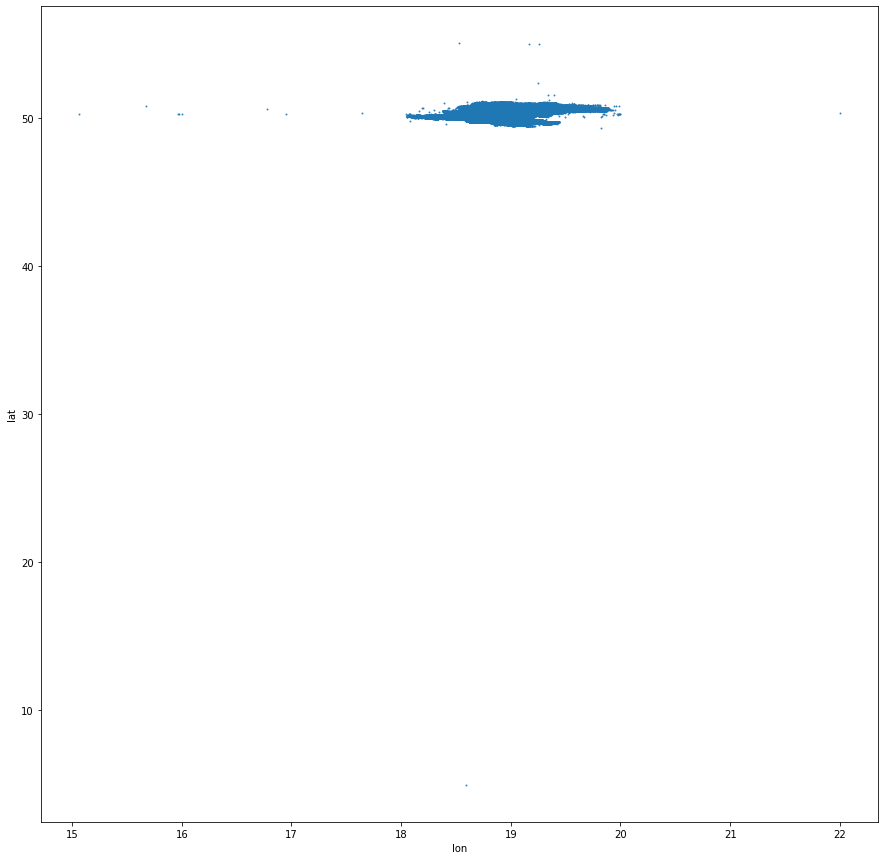

In [67]:
fig, ax = plt.subplots(figsize = (15, 15))
df.plot(kind='scatter', x='lon', y='lat', alpha=0.8, s=1, ax = ax)
plt.show()

Jak widać mamy trochę outlierów, pozbądźmy się ich.

Według https://pl.wikipedia.org/wiki/Wojew%C3%B3dztwo_%C5%9Bl%C4%85skie, współrzędne geograficzne skrajnych punktów województwa to:

- północny: 51°05′57″ szer. geogr. N – nurt Warty w pn.-wsch. narożniku działki ewidencyjnej nr 18/1 (powiat kłobucki),
- południowy: 49°23′38″ szer. geogr. N – słupek graniczny nr 161/6 (powiat żywiecki),
- zachodni: 18°02′06″ dług. geogr. E – słupek graniczny nr 45/5 (powiat raciborski),
- wschodni: 19°58′26″ dług. geogr. E – pn.-wsch. narożnik działki ewidencyjnej nr 124 (powiat zawierciański).

co po konwersji na DD daje nam:

- północny: 51.099167
- południowy: 49.393889
- zachodni: 18.035
- wschodzni: 19.973889

In [68]:
df[df['lat'] < 49.393889]

,data_full,rok,miesiac,godzina,minuta,pelna_data,dzien_tygodnia,czy_weekend,lon,lat,...,zachowanie_kierujacego_niepr_zatrzymanie,zachowanie_kierujacego_niepr_zawracanie,zachowanie_kierujacego_niepr_przejazd_rowerowy,zachowanie_kierujacego_jazda_bez_swiatel,zachowanie_kierujacego_inne_przyczyny,zachowanie_pieszego,ranni,zabici,kolizja,wypadek
135253,2018-06-11 11:11:00,2018,6,11,11,2018-06-11,0,0,18.594722,4.949139,...,0,0,0,0,0,nan,0,0,1,0
203804,2019-08-04 12:03:00,2019,8,12,3,2019-08-04,6,1,19.825083,49.334194,...,0,0,0,0,0,nan,0,0,1,0


In [69]:
df[df['lat'] > 51.099167]

,data_full,rok,miesiac,godzina,minuta,pelna_data,dzien_tygodnia,czy_weekend,lon,lat,...,zachowanie_kierujacego_niepr_zatrzymanie,zachowanie_kierujacego_niepr_zawracanie,zachowanie_kierujacego_niepr_przejazd_rowerowy,zachowanie_kierujacego_jazda_bez_swiatel,zachowanie_kierujacego_inne_przyczyny,zachowanie_pieszego,ranni,zabici,kolizja,wypadek
27105,2016-07-17 18:30:00,2016,7,18,30,2016-07-17,6,1,19.389639,51.554361,...,0,0,0,0,1,nan,0,0,1,0
49595,2016-12-10 23:12:00,2016,12,23,12,2016-12-10,5,1,19.345528,51.205611,...,0,0,0,0,0,nan,0,0,1,0
86014,2016-11-18 15:50:00,2016,11,15,50,2016-11-18,4,0,19.340556,51.512694,...,0,0,0,0,0,nan,0,0,1,0
120955,2018-03-09 08:10:00,2018,3,8,10,2018-03-09,4,0,19.250694,52.363667,...,0,0,0,0,0,nan,0,0,1,0
122869,2018-03-21 19:17:00,2018,3,19,17,2018-03-21,2,0,19.261250,55.012361,...,0,0,0,0,0,nan,0,0,1,0
131415,2018-05-17 09:15:00,2018,5,9,15,2018-05-17,3,0,19.166028,55.012000,...,0,0,0,0,0,nan,0,0,1,0
139483,2018-07-09 21:35:00,2018,7,21,35,2018-07-09,0,0,18.529750,55.015167,...,0,0,0,0,0,nan,0,0,1,0
162191,2018-11-26 19:20:00,2018,11,19,20,2018-11-26,0,0,19.047639,51.264417,...,0,0,0,0,0,nan,0,0,1,0


In [70]:
df[df['lon'] < 18.035]

,data_full,rok,miesiac,godzina,minuta,pelna_data,dzien_tygodnia,czy_weekend,lon,lat,...,zachowanie_kierujacego_niepr_zatrzymanie,zachowanie_kierujacego_niepr_zawracanie,zachowanie_kierujacego_niepr_przejazd_rowerowy,zachowanie_kierujacego_jazda_bez_swiatel,zachowanie_kierujacego_inne_przyczyny,zachowanie_pieszego,ranni,zabici,kolizja,wypadek
20566,2016-06-02 10:55:00,2016,6,10,55,2016-06-02,3,0,17.640861,50.335556,...,0,0,0,0,1,nan,0,0,1,0
32758,2016-08-16 12:50:00,2016,8,12,50,2016-08-16,1,0,15.676500,50.771389,...,0,0,0,0,0,nan,0,0,1,0
34895,2016-09-09 14:00:00,2016,9,14,0,2016-09-09,4,0,16.775611,50.618917,...,0,0,0,0,0,nan,0,0,1,0
37291,2016-09-28 19:45:00,2016,9,19,45,2016-09-28,2,0,15.998528,50.252694,...,0,0,0,0,0,nan,0,0,1,0
134588,2018-06-06 20:30:00,2018,6,20,30,2018-06-06,2,0,15.062306,50.269194,...,0,0,0,0,0,nan,0,0,1,0
160399,2018-11-15 11:35:00,2018,11,11,35,2018-11-15,3,0,15.969667,50.223250,...,0,0,0,0,0,nan,0,0,1,0
161915,2018-11-25 07:47:00,2018,11,7,47,2018-11-25,6,1,16.948417,50.272389,...,0,0,0,0,1,nan,0,0,1,0
173479,2018-11-17 07:40:00,2018,11,7,40,2018-11-17,5,1,15.971806,50.220139,...,0,0,0,0,0,nan,0,0,1,0


In [71]:
df[df['lon'] > 19.973889]

,data_full,rok,miesiac,godzina,minuta,pelna_data,dzien_tygodnia,czy_weekend,lon,lat,...,zachowanie_kierujacego_niepr_zatrzymanie,zachowanie_kierujacego_niepr_zawracanie,zachowanie_kierujacego_niepr_przejazd_rowerowy,zachowanie_kierujacego_jazda_bez_swiatel,zachowanie_kierujacego_inne_przyczyny,zachowanie_pieszego,ranni,zabici,kolizja,wypadek
15349,2016-04-27 13:45:00,2016,4,13,45,2016-04-27,2,0,19.984250,50.269083,...,0,0,0,0,0,nan,0,0,1,0
32880,2016-08-30 16:00:00,2016,8,16,0,2016-08-30,1,0,21.999083,50.341028,...,0,0,0,0,0,nan,0,0,1,0
45271,2016-11-16 07:20:00,2016,11,7,20,2016-11-16,2,0,19.995889,50.234028,...,0,0,0,0,0,nan,0,0,1,0
145949,2018-08-22 09:45:00,2018,8,9,45,2018-08-22,2,0,19.985278,50.224806,...,0,0,0,0,0,nan,0,0,1,0
146928,2018-08-28 13:30:00,2018,8,13,30,2018-08-28,1,0,19.982472,50.777972,...,0,0,0,0,0,nan,0,0,1,0
147956,2018-09-04 08:00:00,2018,9,8,0,2018-09-04,1,0,19.994528,50.238861,...,0,0,0,0,0,nan,0,0,1,0
155437,2018-10-16 11:30:00,2018,10,11,30,2018-10-16,1,0,19.978639,50.277222,...,0,0,0,0,0,nan,0,0,1,0
161478,2018-11-22 14:10:00,2018,11,14,10,2018-11-22,3,0,19.981639,50.187778,...,0,0,0,0,0,nan,0,0,1,0


In [72]:
df.drop(df[df['lat'] < 49.393889].index, inplace=True)
df.drop(df[df['lat'] > 51.099167].index, inplace=True)
df.drop(df[df['lon'] < 18.035].index, inplace=True)
df.drop(df[df['lon'] > 19.973889].index, inplace=True)

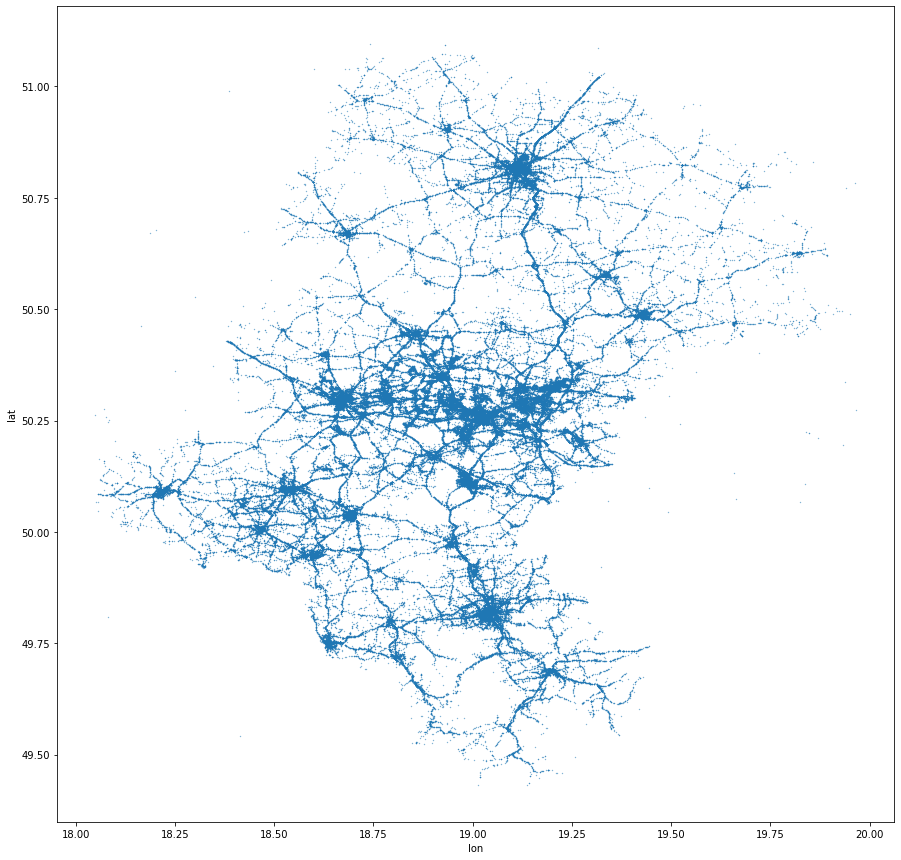

In [73]:
fig, ax = plt.subplots(figsize = (15, 15))
df.plot(kind='scatter', x='lon', y='lat', alpha=0.8, s=0.1, ax = ax)
plt.show()

Klastrowanie DBSCAN

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
import time

In [75]:
# define the number of kilometers in one radiation
# which will be used to convert esp from km to radiation
kms_per_rad = 6371.0088

In [76]:
# define a function to calculate the geographic coordinate 
# centroid of a cluster of geographic points
# it will be used later to calculate the centroids of DBSCAN cluster
# because Scikit-learn DBSCAN cluster class does not come with centroid attribute.
def get_centroid(cluster):
  """calculate the centroid of a cluster of geographic coordinate points
  Args:
    cluster coordinates, nx2 array-like (array, list of lists, etc) 
    n is the number of points(latitude, longitude)in the cluster.
  Return:
    geometry centroid of the cluster
    
  """
  cluster_ary = np.asarray(cluster)
  centroid = cluster_ary.mean(axis = 0)
  return centroid

# testing get_centroid function
test_cluster= [[ 43.70487299, -79.57753802], 
               [ 43.71138367, -79.56524418],
               [ 43.72616079, -79.57319998],
               [ 43.73547907, -79.56258364],
               [ 43.72070325, -79.57202018],
               [ 43.73126031, -79.5598719 ]]
test_centroid = get_centroid(test_cluster)
print(test_centroid)

[ 43.72164335 -79.56840965]


### eps = 0.01, min_samples = 20

In [109]:
# convert eps to radians for use by haversine
epsilon = 0.01/kms_per_rad

# Extract intersection coordinates (latitude, longitude)
wyp_coords = df[['lon', 'lat']].values

start_time = time.time()
dbsc = (DBSCAN(eps=epsilon, min_samples=20, algorithm='ball_tree', metric='haversine')
        .fit(np.radians(wyp_coords)))
wyp_cluster_labels = dbsc.labels_

core_samples_mask = np.zeros_like(dbsc.labels_, dtype=bool)
core_samples_mask[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(wyp_cluster_labels)) - (1 if -1 in wyp_cluster_labels else 0)
n_noise_ = list(wyp_cluster_labels).count(-1)

# print the outcome
message = 'Clustered {:,} points down to {:,} clusters, {:,} noise points, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(df), n_clusters_, n_noise_, 100*(1 - float(num_clusters) / len(df)), time.time()-start_time))
#print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(wyp_coords, wyp_cluster_labels)))

# turn the clusters into a pandas series,where each element is a cluster of points
dbsc_clusters = pd.Series([wyp_coords[wyp_cluster_labels==n] for n in range(num_clusters)])

Clustered 229,903 points down to 331 clusters, 218,945 noise points, for 99.8% compression in 22.49 seconds


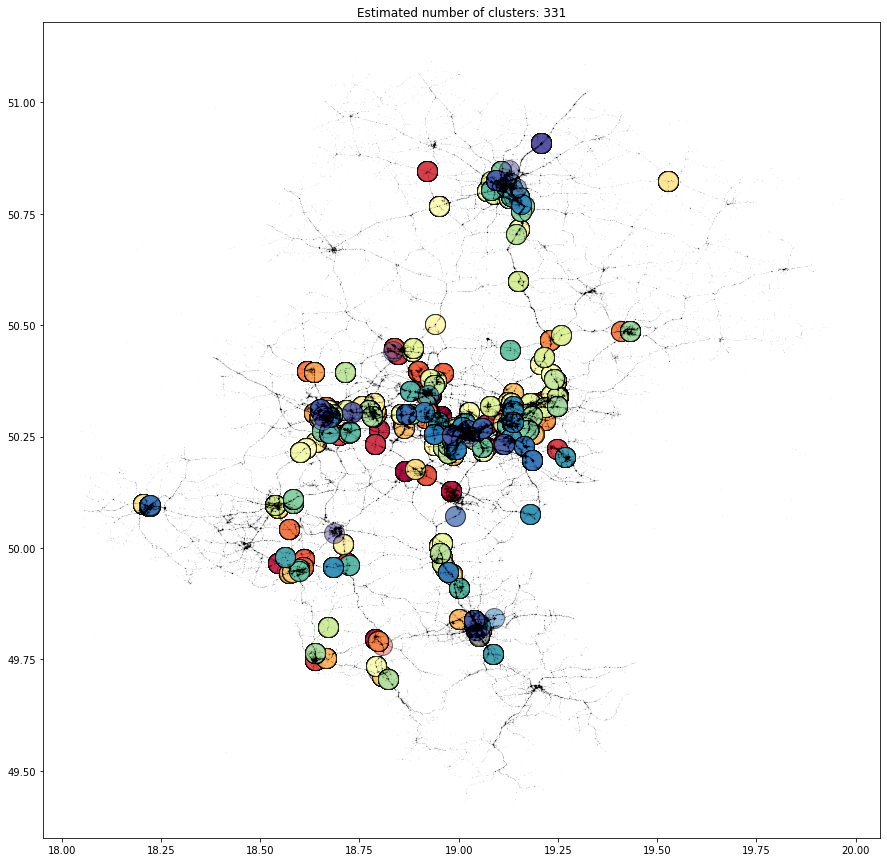

In [110]:
# Black removed and is used for noise instead.
unique_labels = set(wyp_cluster_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(15,15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (wyp_cluster_labels == k)

    xy = wyp_coords[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=20, alpha=0.5)

    xy = wyp_coords[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=0.1, alpha=0.2)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### eps = 0.1, min_samples = 50

In [106]:
# convert eps to radians for use by haversine
epsilon = 0.1/kms_per_rad

# Extract intersection coordinates (latitude, longitude)
wyp_coords = df[['lon', 'lat']].values

start_time = time.time()
dbsc = (DBSCAN(eps=epsilon, min_samples=50, algorithm='ball_tree', metric='haversine')
        .fit(np.radians(wyp_coords)))
wyp_cluster_labels = dbsc.labels_

core_samples_mask = np.zeros_like(dbsc.labels_, dtype=bool)
core_samples_mask[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(wyp_cluster_labels)) - (1 if -1 in wyp_cluster_labels else 0)
n_noise_ = list(wyp_cluster_labels).count(-1)

# print the outcome
message = 'Clustered {:,} points down to {:,} clusters, {:,} noise points, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(df), n_clusters_, n_noise_, 100*(1 - float(num_clusters) / len(df)), time.time()-start_time))
#print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(wyp_coords, wyp_cluster_labels)))

# turn the clusters into a pandas series,where each element is a cluster of points
dbsc_clusters = pd.Series([wyp_coords[wyp_cluster_labels==n] for n in range(num_clusters)])

Clustered 229,903 points down to 369 clusters, 180,832 noise points, for 99.8% compression in 22.66 seconds


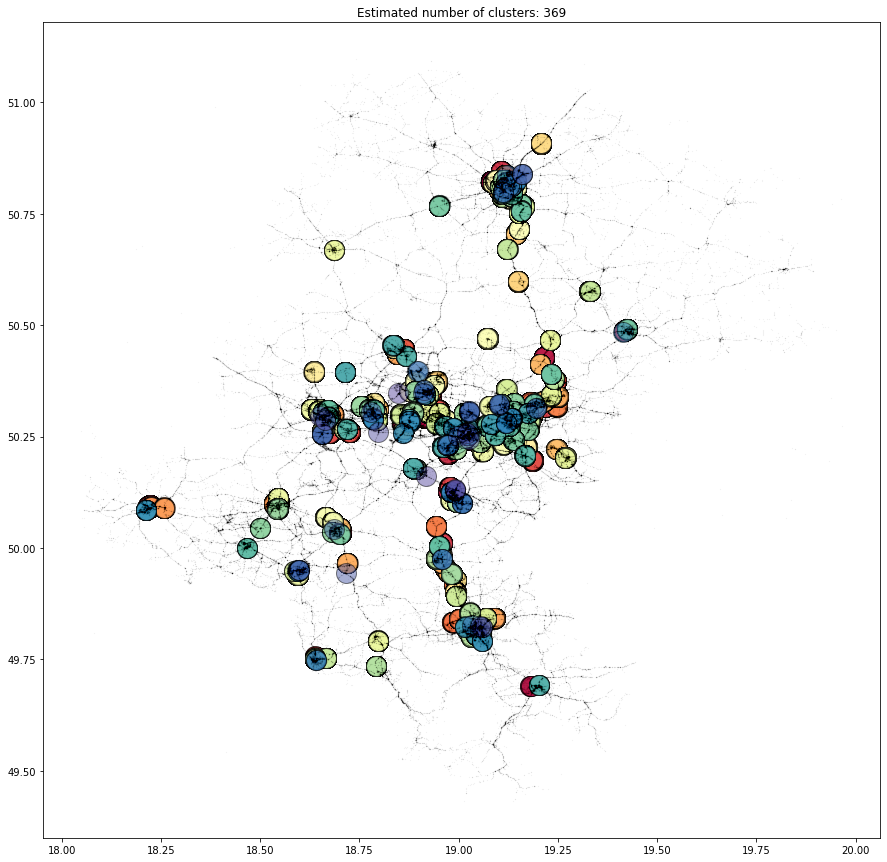

In [107]:
# Black removed and is used for noise instead.
unique_labels = set(wyp_cluster_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(15,15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (wyp_cluster_labels == k)

    xy = wyp_coords[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=20, alpha=0.5)

    xy = wyp_coords[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=0.1, alpha=0.2)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### eps = 0.5, min_samples = 50

In [104]:
# convert eps to radians for use by haversine
epsilon = 0.5/kms_per_rad

# Extract intersection coordinates (latitude, longitude)
wyp_coords = df[['lon', 'lat']].values

start_time = time.time()
dbsc = (DBSCAN(eps=epsilon, min_samples=50, algorithm='ball_tree', metric='haversine')
        .fit(np.radians(wyp_coords)))
wyp_cluster_labels = dbsc.labels_

core_samples_mask = np.zeros_like(dbsc.labels_, dtype=bool)
core_samples_mask[dbsc.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(wyp_cluster_labels)) - (1 if -1 in wyp_cluster_labels else 0)
n_noise_ = list(wyp_cluster_labels).count(-1)

# print the outcome
message = 'Clustered {:,} points down to {:,} clusters, {:,} noise points, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(df), n_clusters_, n_noise_, 100*(1 - float(num_clusters) / len(df)), time.time()-start_time))
#print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(wyp_coords, wyp_cluster_labels)))

# turn the clusters into a pandas series,where each element is a cluster of points
dbsc_clusters = pd.Series([wyp_coords[wyp_cluster_labels==n] for n in range(num_clusters)])

Clustered 229,903 points down to 246 clusters, 56,046 noise points, for 99.8% compression in 42.29 seconds


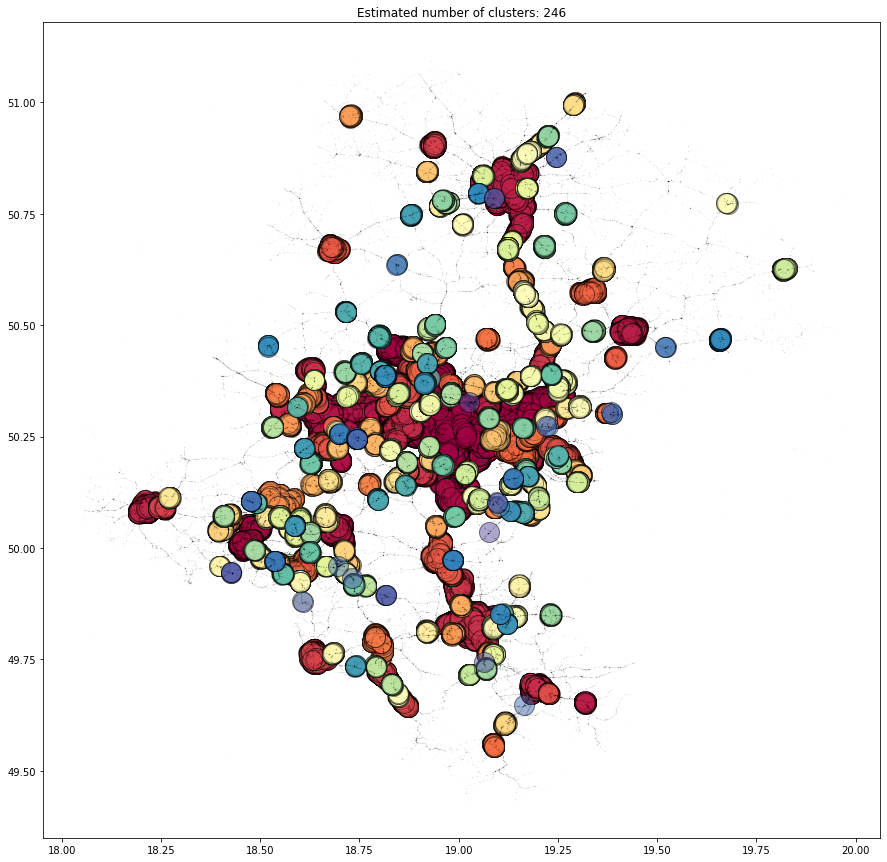

In [105]:
# Black removed and is used for noise instead.
unique_labels = set(wyp_cluster_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(15,15))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (wyp_cluster_labels == k)

    xy = wyp_coords[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=20, alpha=0.5)

    xy = wyp_coords[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=0.1, alpha=0.2)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()